# Train Test Split

In [1]:
import seaborn as sns; sns.set()

#Chargement du dataset
iris = sns.load_dataset('iris')

iris.shape

In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/q-pi/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

(150, 5)

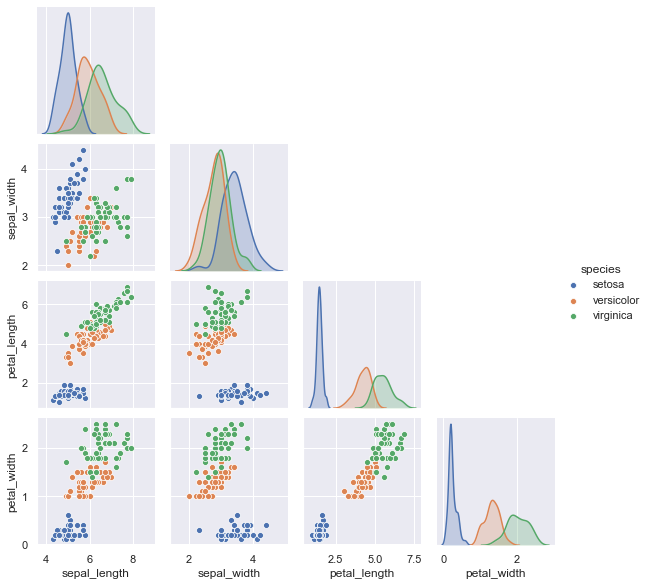

In [2]:
#Pairplot
sns.pairplot(iris, hue='species', corner=True, height=2)

In [3]:
#Isolation
Y = iris["species"]
X = iris.drop(columns='species')

In [4]:
from sklearn.model_selection import train_test_split

#Préparation pour TTS
splits = train_test_split(X, Y, 
                         train_size = 0.3,
                         stratify=Y,
                         random_state=6)

#for each in splits:
#    print(each.shape)

X_train, X_test, Y_train, Y_test = splits

In [5]:
from sklearn.neighbors import KNeighborsClassifier as KNN #KNeighborsRegressor
knn = KNN(n_neighbors=3)

#Entrainement
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
#Test
predictions_test = knn.predict(X_test)

In [7]:
#Créer une mesure de performance
def accuracy(preds, Y):
    return (preds == Y).sum() / len(Y)

#Performance du test
accuracy(predictions_test, Y_test)

0.9428571428571428

## Cross Validation

In [29]:
knn = KNN(n_neighbors=3)
from sklearn.model_selection import cross_val_score
result = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
sum(result)/len(result)

0.9666666666666668

In [30]:
def CV(X, Y, CV_K=5, KNN_K=3, random=2):
    Xs = []
    Ys = []
    knns = []
    preds = []
    accs = []
    #division
    for i in range(0, K-1):
        splits = train_test_split(X, Y, 
                         train_size = (1/(K-i)),
                         stratify=Y,
                         random_state=random)
        #for each in splits:
        #    print(each.shape)
        Xs.append(splits[0])
        Ys.append(splits[2])
        X = splits[1]
        Y = splits[3]
        knns.append(KNN(n_neighbors=KNN_K))
    Xs.append(X)
    Ys.append(Y)
    knns.append(KNN(n_neighbors=KNN_K))
    #training
    for i in range(0, K):
        for j in range(0, i):
            knn.fit(Xs[i], Ys[i])
        for j in range(i+1, K):
            knn.fit(Xs[i], Ys[i])
    #predictions
    for i in range(0, K):
        preds.append(knn.predict(Xs[i]))
    #performances
    for i in range(0, K):
        accs.append(accuracy(preds[i], Ys[i]))
    return sum(accs)/len(accs)

K = 10
print('CV(X, Y, {}): {:.3f}'.format(K, CV(X, Y, K, random=4)))

CV(X, Y, 10): 0.960


In [11]:
#Cross-validation manuelle pour K=3

#from sklearn.model_selection import train_test_split

#Préparation pour TTS
#splits = train_test_split(X, Y, 
#                         train_size = 0.3,
#                         stratify=Y,
#                         random_state=6)

#X_1, X_tmp, Y_1, Y_tmp = splits

#splits = train_test_split(X_tmp, Y_tmp, 
#                         train_size = 0.5,
#                         stratify=Y_tmp,
#                         random_state=6)

#X_2, X_3, Y_2, Y_3 = splits

#knn = KNN(n_neighbors=3)
#knn.fit(X_1, Y_1)
#knn.fit(X_2, Y_2)
#preds = knn.predict(X_3)
#acc1 = accuracy(preds, Y_3)

#knn = KNN(n_neighbors=3)
#knn.fit(X_1, Y_1)
#knn.fit(X_3, Y_3)
#preds = knn.predict(X_2)
#acc2 = accuracy(preds, Y_2)

#knn = KNN(n_neighbors=3)
#knn.fit(X_2, Y_2)
#knn.fit(X_3, Y_3)
#preds = knn.predict(X_1)
#acc3 = accuracy(preds, Y_1)